In [17]:
library(tidyverse)
library(readxl)

In [18]:
egdi <- read.csv('EGOV_DATA_2024.csv') %>%
    arrange(Country.Name) %>%
    select(
            Country.Name,
            E.Government.Index,
            E.Participation.Index, 
            Online.Service.Index, 
            Human.Capital.Index, 
            Telecommunication.Infrastructure.Index
        )

In [19]:
glimpse(egdi)

Rows: 193
Columns: 6
$ Country.Name                           <chr> "Afghanistan", "Albania", "Alge…
$ E.Government.Index                     <dbl> 0.20827, 0.80000, 0.59556, 0.68…
$ E.Participation.Index                  <dbl> 0.1096, 0.7260, 0.0548, 0.5479,…
$ Online.Service.Index                   <dbl> 0.14379, 0.81441, 0.33200, 0.47…
$ Human.Capital.Index                    <dbl> 0.26430, 0.81059, 0.64179, 0.66…
$ Telecommunication.Infrastructure.Index <dbl> 0.21672, 0.77497, 0.81290, 0.92…


In [20]:
gastos_publicos <- read_excel('imf_government_expenditure.xls') %>% 
    arrange(Country)

In [21]:
gastos_publicos <- gastos_publicos %>% 
    mutate(Country = case_when(
        Country == 'Vietnam' ~ 'Viet Nam',
        Country == 'Georgia' ~ 'Georgia (Country)',
        Country == 'China, People\'s Republic of' ~ 'China',
        Country == 'China, People\'s Republic of' ~ 'China',
        Country == 'Republic of Congo' ~ 'Congo',
        Country == 'Türkiye, Republic of' ~ 'Türkiye',
        Country == "Micronesia, Fed. States of" ~ "Micronesia (Federated States of)",
        Country == "United States" ~ "United States of America",
        Country == "United Kingdom" ~ "United Kingdom of Great Britain and Northern Ireland",
        Country == "Tanzania" ~ "United Republic of Tanzania",
        Country == "Slovak Republic" ~ "Slovakia",
        Country == "Moldova" ~ "Republic of Moldova",
        Country == "Kyrgyz Republic" ~ "Kyrgyzstan",
        Country == "Korea, Republic of" ~ "Republic of Korea",
        Country == "Iran" ~ "Iran (Islamic Republic of)",
        TRUE ~ Country
    ))

In [22]:
gastos_publicos <- gastos_publicos %>%
    filter(Country %in% egdi$Country.Name)

In [23]:
egdi <- egdi %>%
    filter(Country.Name %in% gastos_publicos$Country)

In [24]:
df <- data.frame(
    indices = c(
        'EGDI',
        'E.Participation.Index ',
        'OSI',
        'HCI',
        'TCI'
    ),
    correlacoes = c(
        cor(gastos_publicos$Percentage, egdi$E.Government.Index, method = 'spearman'),
        cor(gastos_publicos$Percentage, egdi$E.Participation.Index, method = 'spearman'),
        cor(gastos_publicos$Percentage, egdi$Online.Service.Index, method = 'spearman'),
        cor(gastos_publicos$Percentage, egdi$Human.Capital.Index, method = 'spearman'),
        cor(gastos_publicos$Percentage, egdi$Telecommunication.Infrastructure.Index, method = 'spearman')
    )
)

In [25]:
my_plot = ggplot(df, aes(indices, correlacoes)) +
    geom_col(fill = "steelblue") +
    labs(
        x = 'Índices',
        y = 'Escala'
    ) +
    coord_cartesian(ylim = c(0, 1)) +
    geom_text(
        aes(label = round(correlacoes, 2)), 
        vjust = -0.5
    )

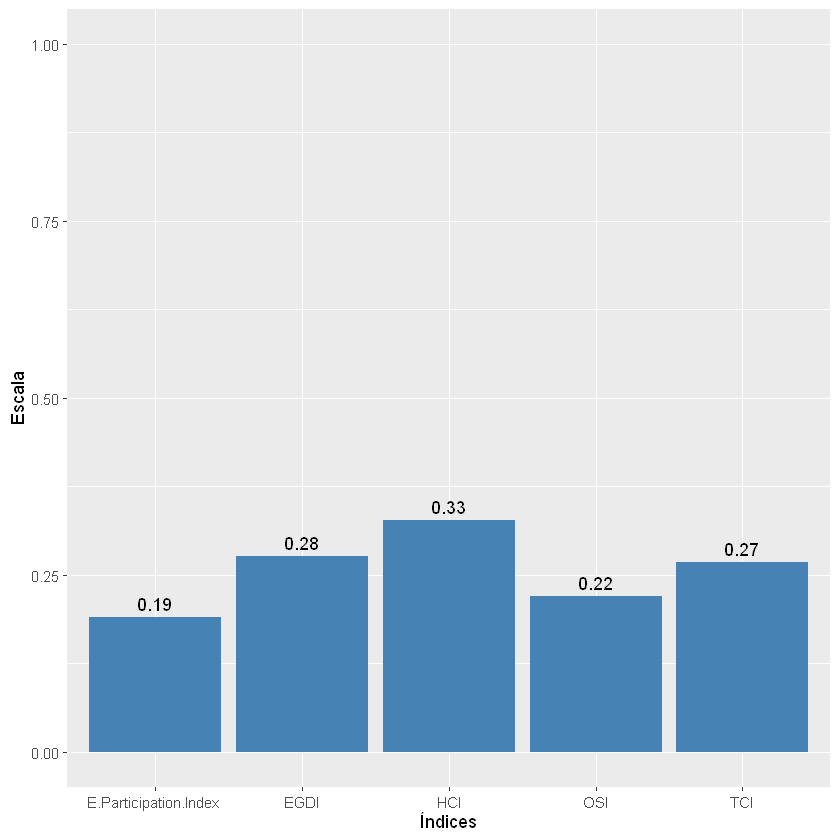

In [26]:
my_plot

In [27]:
ggsave(
    'C:/Users/lazar/Master-Dissertation/figuras/correlacao_egdi_gastospublicos.png', 
    dpi=300,
    width = 25.4,
    height = 15.24,
    units = "cm"
)